# Introduction
The purpose of this jupyter notebook is to introduce you to the **STGrid** functionality of the **t4gpd** package. It is a question here of sampling the bounding box of a given GeoDataFrame according to sample lengths passed as arguments. To enable this feature, you must first have installed the **t4gpd** package.

# Let's start by loading the required python modules
First we need the [GeoPandas](https://geopandas.org/) library to retrieve its world map and corresponding dataset. Then we need a tool for mapping the data, which is why we load the [matplotlib.pyplot](https://matplotlib.org/) library. Then we load the [shapely](shapely.readthedocs.io/) library so that we can limit our dataset according to a given polygonal region of interest. Finally, we invoke the STGrid feature of t4gpd.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
from t4gpd.morph.STClip import STClip
from t4gpd.morph.STGrid import STGrid

# Let's load a pre-recorded dataset

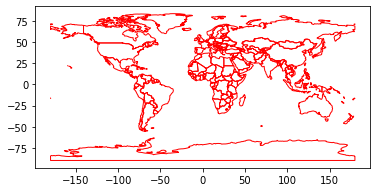

In [2]:
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Let's display it...
basemap = countries.boundary.plot(color='red', linewidth=1.0)
plt.show()

# Let's continue with a simple attribute selection (using the country name)

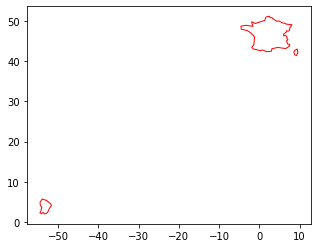

In [3]:
countries = countries.query('"France" == name')
# Let's display it...
basemap = countries.boundary.plot(color='red', linewidth=1.0)
plt.show()

# Geometric selection
For reasons of legibility, let's limit ourselves to the northern hemisphere.

In [4]:
wgs84_roi = Polygon([(-10, 40), (-10, 52), (10, 52), (10, 40)])
# countries = gpd.clip(countries, wgs84_roi)
countries = STClip(countries, wgs84_roi).run()
# Let's display the result
basemap = countries.boundary.plot(color='red', linewidth=1.0)
plt.show()

<class 'generator'> <generator object Index._get_ids at 0x000002A88D6B9D48>
<class 'int'> 0


KeyError: 0

# Let's change the coordinate system used

The objective here is to move from angular coordinates (latitude/longitude) to a metric geographic coordinate system using the appropriate [EPSG](https://epsg.io/2154) code.

In [ ]:
countries = countries.to_crs("EPSG:2154")
# Let's display the result
basemap = countries.boundary.plot(color='red', linewidth=1.0)
plt.show()

# We still have to divide the space into square zones of 200 km ($2\times 10^5$ m) on each side.

In [ ]:
grid = STGrid(countries, dx=2e5, dy=None, indoor=None, intoPoint=False).run()
# Let's display the result
basemap = countries.boundary.plot(color='red', linewidth=1.0)
grid.boundary.plot(ax=basemap, color='darkgrey')
plt.show()